Some events form in different astrophysical environments than others. **You want to figure out how many of formation channels are at play.**


The strategy here is to fit a Gaussian Mixture model: that is, my model is a sum of $N$ gaussians each with mean $\mu_j$ and standard deviation $\sigma_j$ and weight $\alpha_j$:

$p(x_i|\theta) = \sum_{j=1}^N \alpha_j \mathcal{N}(\mu_j,\sigma_j) $

This depends on $3N-1$ parameters (not $3N$ because the sum of the $\alpha_j$ must be unity to ensure that this is a probability.

#### Tasks

1) Load this file (`np.load`) and complete a quick exploration of the data. How many modes do you think you see?

2) Take some time to explore `sklearn.mixture.GaussianMixture`. Check the documentation, some examples, the help menu, etc. You first need to define the model (instance of a class), and then train it on the data using the `fit` method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.

*Note*. We'll do a more formal introduction to scikit-learn in one of the next lectures. This is meant to be a formative example on how you might find yourself dealing with a library you've never seen before. This happens *all the time* in scientific research!

3) Complete the fit 10 times with $N=1,...,10$ Gaussians. 

Note: `sklearn` by default will use the so-called [Expectation-Maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm), which is one of the many great things in data science we don't have time to study in detail.

4) For each of this fits, compute the AIC (easy! It's a attribute of the trained model!). Plot $N$ vs AIC: which model is preferred? The AIC needs to be minimised

5) Plot the preferred solution on top of the input data. You should get a very nice fit!

6) Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset. 

*Hint:* Useful methods here are `score_samples` and `predict_proba`: you'll need them both. Try to understand what they do and how you can put them together.




Text(0.5, 0, '$M_c$ [$M_\\odot$]')

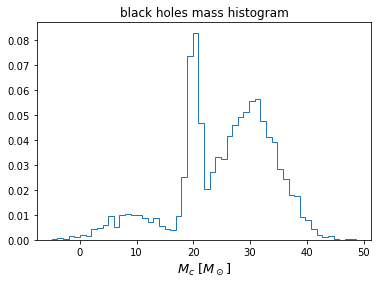

In [23]:
import numpy as np
import matplotlib.pyplot as plt

#loading the data from the file: it is an array with shape (N, 1)
data = np.load('formationchannels.npy')
plt.hist(data, int(np.sqrt(len(data))), histtype = 'step', density = True)
plt.title('black holes mass histogram')
plt.xlabel('$M_c$ [$M_\odot$]', fontsize = 13)

In [49]:
from sklearn import mixture 
from scipy.stats import norm

#number of tries
N = 10

#defining our model: a mixture of n_gauss gaussians
def model_func(n_gauss):
    model = mixture.GaussianMixture(n_components=n_gauss).fit(data)
    return model.means_, model.covariances_

for i in range(1, N+1, 1):
    means, covariances = model_func(i)
    #print('run number', i, 'means = ', means, 'covariances = ', covariances)
    
#https://www.astroml.org/book_figures/chapter4/fig_GMM_1D.html look at this link to plot

    

run number 1 means =  [[25.52008475]] covariances =  [[[70.88768431]]]
run number 2 means =  [[19.92769331]
 [30.10079882]] covariances =  [[[66.37513688]]

 [[27.98381333]]]
run number 3 means =  [[30.10090724]
 [20.04654337]
 [ 9.10403766]] covariances =  [[[24.28710635]]

 [[ 1.10877035]]

 [[21.90277672]]]
run number 4 means =  [[20.10002795]
 [34.21675547]
 [ 9.21477509]
 [28.06953238]] covariances =  [[[ 1.34100687]]

 [[13.44261547]]

 [[22.40620194]]

 [[11.25652561]]]
run number 5 means =  [[34.29499128]
 [20.08255922]
 [28.13386682]
 [11.46698473]
 [ 5.93761178]] covariances =  [[[13.41329347]]

 [[ 1.38520351]]

 [[11.60614354]]

 [[10.13233664]]

 [[14.36449964]]]
run number 6 means =  [[36.60917651]
 [26.68151225]
 [20.11786766]
 [11.5002675 ]
 [31.78316713]
 [ 5.80168594]] covariances =  [[[ 8.99082108]]

 [[ 5.75004123]]

 [[ 1.47103801]]

 [[ 9.6131035 ]]

 [[ 4.73670503]]

 [[13.62711461]]]
run number 7 means =  [[25.63510005]
 [ 5.7188254 ]
 [33.6194174 ]
 [20.1061595